In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [4]:
# Loading the dataset
df = pd.read_csv('/content/Prodigy University Dataset.csv')
df.head()

,sat_sum,hs_gpa,fy_gpa
0,508,3.40,3.18
1,488,4.00,3.33
2,464,3.75,3.25
3,380,3.75,2.42
4,428,4.00,2.63


In [5]:
# Feature and Target
X = df[['sat_sum', 'hs_gpa']]
y = df['fy_gpa']

# Train-Test Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Linear Regression Prediction
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 0.39629495572710655
R² Score: 0.33107486660975827


In [8]:
# ANN
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [9]:
optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'Adagrad': Adagrad(learning_rate=0.01),
    'RMSprop': RMSprop(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01)
}

histories = {}

for name, opt in optimizers.items():
    print(f"Training with {name}...")
    model = build_ann(opt)
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.2)
    histories[name] = history

Training with SGD...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Momentum...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Nesterov...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Adagrad...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with RMSprop...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with Adam...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


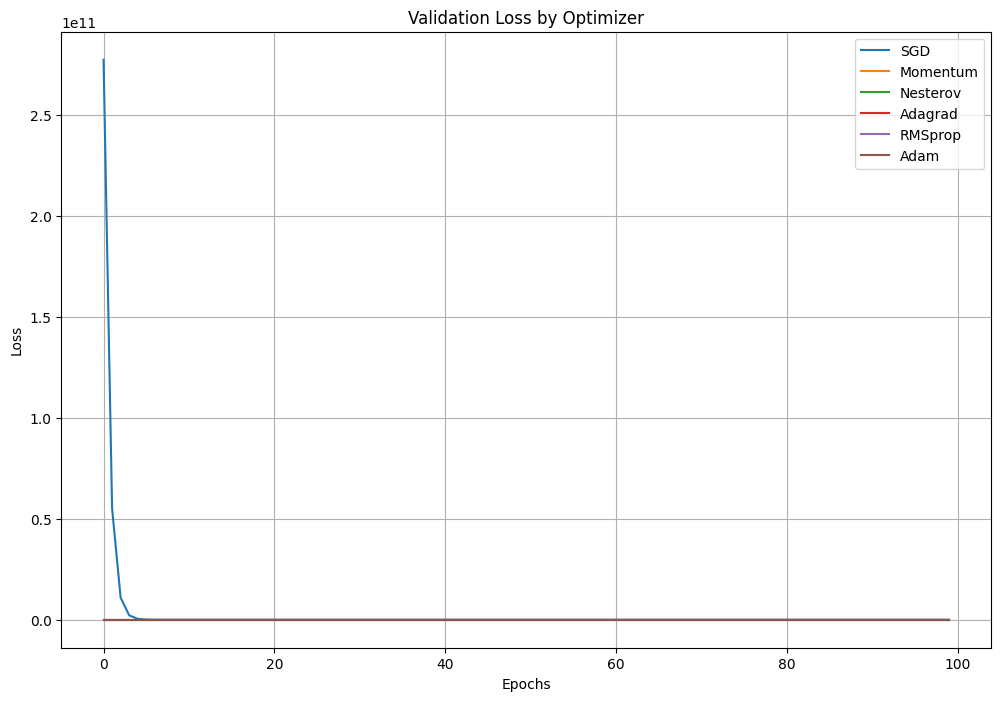

In [10]:
#optimizers plotting
plt.figure(figsize=(12, 8))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title("Validation Loss by Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# ANN prediction
best_model = build_ann(Adam(learning_rate=0.01))
best_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

y_pred_ann = best_model.predict(X_test)

print("ANN Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred_ann))
print("R² Score:", r2_score(y_test, y_pred_ann))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ANN Evaluation:
MSE: 0.4463314789976441
R² Score: 0.24661583547796517
